### ***SECTION 1 프로젝트***

### **다음 분기에 어떤 게임을 설계해야할까**

In [ ]:
# 라이브러리 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

plt.style.use("default")

In [ ]:
# 파일 업로드

from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2 (3).csv


In [ ]:
# 파일 정렬이 어떤지 표로 확인

vgame = pd.read_csv('vgames2.csv')
vgame.head(2)

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01


* name : 게임의 이름
* Platform : 게임이 지원되는 플랫폼
* Year : 게임이 출시된 연도
* Genre : 게임의 장르
* Publisher : 게임을 제작한 회사
* NA_Sales : 북미 지역에서의 출고량
* EU_Sales : 유럽 지역에서의 출고량
* JP_Sales : 일본 지역에서의 출고량
* Other_Sales : 기타 지역에서의 출고량 

## 분석 및 목표 설정 :

1. 지역에 따라서 선호하는 게임 장르가 다를까

2. 연도별 게임의 트렌드가 있을까

3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스


## 최종목표

  다음분기에 어떤 게임을 설계해야할지

  1. 타겟 지역 설정

  2. 현시대 트렌드에 맞는 플랫폼 및 장르 설정

  3. 게임 제작 회사 (합작 및 투자 고려)

In [ ]:
# 데이터타입과 행개수 확인
 
vgame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [ ]:
vgame = vgame.drop(vgame.columns[[0]],axis=1)

In [ ]:
# 중복된 데이터가 있는지 확인

vgame.duplicated().sum()

290

In [ ]:
# 중복된 행 제거 

vgame.drop_duplicates()

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,DS,2008.0,Action,Destineer,0.04,0,0,0
1,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...
16592,PSP,2007.0,Misc,Zenrin,0,0,0.02,0
16594,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
# 결측값이 있는지 확인
# Year와 Genre는 분석에 필요한 값이므로 결측치가 있는 행 삭제할 예정
# Publisher 결측치는 게임 장르와 연도 분석에 영향을 끼치 않으므로 결측치는 unknown이라는 값으로 대체할 예정
vgame.isnull().sum()

Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
vgame.dropna(subset=['Year'], inplace=True)
vgame.dropna(subset=['Genre'], inplace=True)
vgame

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,DS,2008.0,Action,Destineer,0.04,0,0,0
1,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...
16593,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
vgame['Publisher'] = vgame['Publisher'].fillna('unknown')
vgame['Publisher']

0                          Destineer
1                 Namco Bandai Games
2                          Alchemist
3                          Zoo Games
4                        D3Publisher
                    ...             
16593                  Vivendi Games
16594              Rising Star Games
16595           Take-Two Interactive
16596                     Tecmo Koei
16597    Sony Computer Entertainment
Name: Publisher, Length: 16277, dtype: object

In [ ]:
vgame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16277 entries, 0 to 16597
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Platform     16277 non-null  object 
 1   Year         16277 non-null  float64
 2   Genre        16277 non-null  object 
 3   Publisher    16277 non-null  object 
 4   NA_Sales     16277 non-null  object 
 5   EU_Sales     16277 non-null  object 
 6   JP_Sales     16277 non-null  object 
 7   Other_Sales  16277 non-null  object 
dtypes: float64(1), object(7)
memory usage: 1.1+ MB


In [ ]:
vgame.isnull().sum()

Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [ ]:
# 데이터 타입을 살펴본 결과 수정해야할 데이터타입 
# Year는 실수가 아닌 정수로 변경


In [ ]:
vgame.Year.describe()

count    16277.000000
mean      1994.206365
std        155.313461
min          0.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

(array([  100.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 16177.]),
 array([   0.,  202.,  404.,  606.,  808., 1010., 1212., 1414., 1616.,
        1818., 2020.]),
 <a list of 10 Patch objects>)

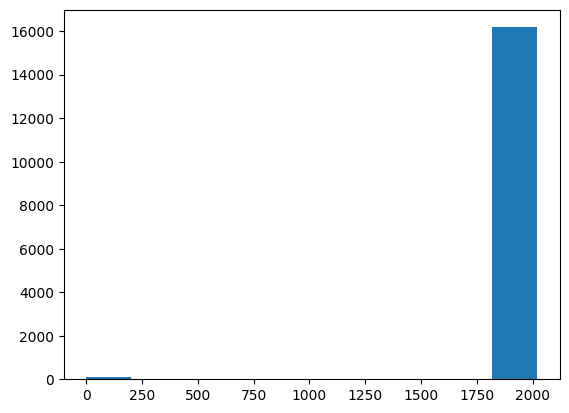

In [ ]:
plt.hist(vgame.Year)

# 너무 오래된 연도의 데이터는 현재 트렌드를 분석하는데 방해요인이 된다고 판단


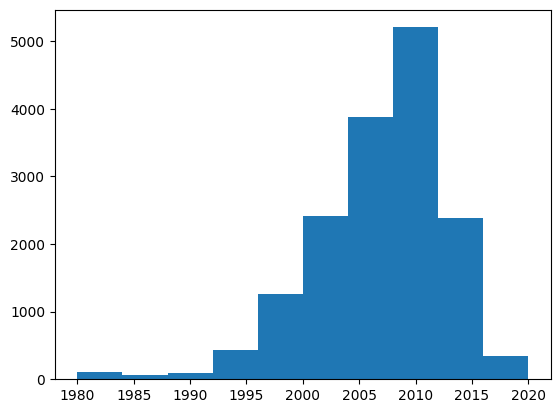

In [ ]:
plt.hist(vgame.Year[vgame.Year > 1750]);

# 대부분의 데이터가 1980년대 이후의 데이터에 집중되어있음을 발견하여 1980년 이후의 데이터만으로 분석 시행

In [ ]:
vgame_after1980 = vgame.sort_values(by=["Year"],ascending=[True])
vgame_after1980.query('Year>=1980')

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
5938,2600,1980,Misc,Activision,1.07,0.07,0,0.01
14264,2600,1980,Fighting,Activision,0.72,0.04,0,0.01
5723,2600,1980,Shooter,Atari,4,0.26,0,0.05
9226,2600,1980,Misc,Activision,0.25,0.02,0,0
13133,2600,1980,Action,Activision,0.32,0.02,0,0
...,...,...,...,...,...,...,...,...
13777,XOne,2016,Sports,Electronic Arts,0.13,0.01,0,0.02
10107,PS4,2017,Role-Playing,Sega,0,0,0.03,0
5310,PSV,2017,Action,Idea Factory,0,0,0.01,0
15233,PSV,2017,Role-Playing,Sega,0,0,0.01,0


In [ ]:
vgame_after1980.query('Year>=1980').groupby(['Year', 'Genre'],as_index=False)['Genre'].mean()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Year,Genre
0,1980,Action
1,1980,Fighting
2,1980,Misc
3,1980,Shooter
4,1981,Action
...,...,...
383,2016,Sports
384,2016,Strategy
385,2017,Action
386,2017,Role-Playing
